# ***Classificação de Maças - Machine Learning Direto ao Ponto***
### **Projeto Complementar e Não Extenso para Classificação da Qualidade das Maças entre Boa ou Ruim (Good, Bad)**
### **Direto ao Ponto porém Documentado**
### **Principais Etapas**

### **Importando Todas as Bibliotecas para o Projeto**

In [1]:
# Importando Bibliotecas para Análise de Dados, Visualização de Dados, Análise Exploratória, Tratamento de Dados e Manipulação
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns 

# Importando Biblioteca para Mensagens de Aviso para Melhorar a Legibilidade do Código e Suprimir Saídas Desnecessárias
import warnings
warnings.filterwarnings('ignore')

# Importando bibliotecas necessárias de codificadores e barras de progresso para preprocessamento de dados
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
 
# Funções e distribuições estatísticas e escalonamento de recursos
from scipy import stats  
from scipy.stats import norm   
from sklearn.preprocessing import MinMaxScaler   

# Importando a divisão de dados, métricas de avaliação de modelo, validação cruzada, ajuste de hiperparâmetros e desempenho de classificação
from sklearn.model_selection import train_test_split   
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import roc_auc_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.model_selection import GridSearchCV   
from sklearn.metrics import classification_report  
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import RepeatedStratifiedKFold  
from sklearn.metrics import precision_recall_curve 

# Importando Classificadores para Construir o Machine Learning
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC 

### **Carregando a Base a Dados e Visualizando Primeiras Linhas**

In [3]:
data = pd.read_csv("apple_quality.csv")

data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [4]:
data.shape

(4001, 9)

In [5]:
data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [7]:
data = data.drop("A_id", axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [10]:
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')

data.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [11]:
data.shape

(4001, 8)

In [12]:
data.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [13]:
data.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [18]:
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [19]:
data1 = data.copy(deep=True)

In [26]:
data1.Quality.value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

In [28]:
data1.Quality.unique()

array(['good', 'bad'], dtype=object)

In [33]:
data1.Quality.describe()

count     4000
unique       2
top       good
freq      2004
Name: Quality, dtype: object

### **Substituindo os Valores "good" por 1 e "bad" por 0 na coluna 'Quality' do DataFrame 'data1'.**
### **Em seguida, Contando as Ocorrências de Cada Valor único na Coluna 'Quality'.**

In [34]:
data1.Quality.replace({"good":1, "bad":0}, inplace=True)

data1["Quality"].value_counts()

1    2004
0    1996
Name: Quality, dtype: int64

### **Gerando um Gráfico de Pizza Mostrando a Distribuição Percentual dos Valores da Coluna 'Quality' no DataFrame 'data1'.**
### **Além disso, criando um gráfico de contagem para exibir o número de ocorrências para cada valor de 'Quality'.**

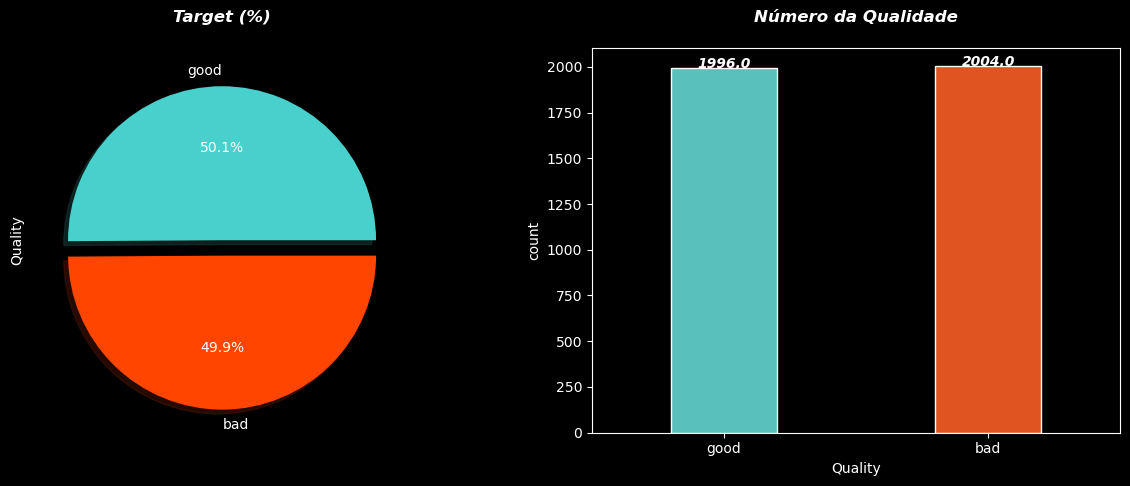

In [40]:
l = data1['Quality'].value_counts()
colors = ['mediumturquoise', 'orangered']
plt.style.use('dark_background')

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
plt.subplot(1,2,1)
l.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, labels=['good', 'bad'], colors=colors)
plt.title('Target (%)\n', fontsize=12, fontweight='bold', style='italic')


plt.subplot(1,2,2)
ax = sns.countplot(x='Quality', data=data1, palette=colors, edgecolor='white', width=0.4)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10, fontweight='bold', style='italic')
ax.set_xticklabels(['good', 'bad'])
plt.title('Número da Qualidade\n', fontsize=12, fontweight='bold', style='italic')
plt.show()